## **Latent Dirichlet Allocation**

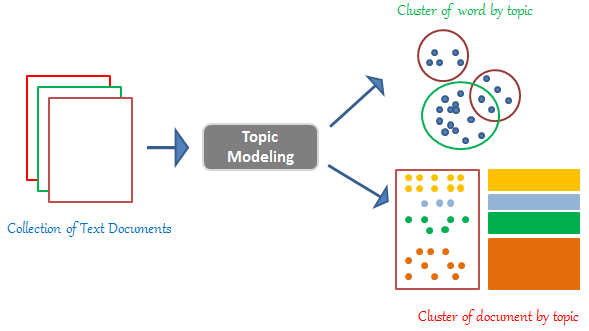

Allows for us to efficently analyze large volumes of text by clustering documents into topics . Here we have large amount of data which is unlabelled meaning we cannot apply supervised learning approches . 
Also it is unsupervised so we cannot really evaluate our model.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("npr.csv")

In [ ]:
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [ ]:
dtm = cv.fit_transform(df['Article'])

**This corpus has 54777 unique words and here a document term matrix is created . Document term matrix is a sparse matrix containing 1 for the word which is present**

In [ ]:
dtm.shape   

(11992, 54777)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
lda = LatentDirichletAllocation(n_components = 7,random_state=42)

**Here by doing fit we are just calculating the probabilities not transforming the actual document **
**And n_component is  decided by you that how many topic our model should contain here i choose 7**

In [ ]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [ ]:
len(cv.get_feature_names())

54777

In [ ]:
cv.get_feature_names_out()[50000]

'transcribe'

In [ ]:
lda.components_.shape

(7, 54777)

In [ ]:
single_topic = lda.components_[0]

In [ ]:
single_topic.argsort()   #index sort means the word at index at 2475 has minimum probablity

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993])

In [ ]:
#least ---> greatet
top_te=single_topic.argsort()[-20:] 

In [ ]:
for index in top_te:
  print(cv.get_feature_names()[index])

#first topic has this much feature that occur more

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
n=0
for i,topic in enumerate(lda.components_):
  top_15=topic.argsort()[-15:]
  print(f"for topic {n}")
  print([cv.get_feature_names()[index] for index in top_15])
  print("----------------------------------")
  print("\n")
  n+=1

#probability of words belonging to particular topic 


for topic 0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']
----------------------------------


for topic 1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']
----------------------------------


for topic 2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']
----------------------------------


for topic 3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']
----------------------------------


for topic 4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']
----------------------------------


for topic 5
['years', 'going', 've', 'life

In [ ]:
topic_result = lda.transform(dtm)

In [ ]:
topic_result[0].round(3)  #probability of document belonging to a particular topic

array([0.016, 0.683, 0.   , 0.   , 0.3  , 0.   , 0.   ])

In [ ]:
topic_result.shape

(11992, 7)

In [ ]:
df['Article'][1]  #we can see this document is somewhat matching with topic 2

In [ ]:
topic_result[0].argmax()

1

In [ ]:
df['topic']=topic_result.argmax(axis=1)

In [ ]:
df.head()

,Article,topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2


By using this method we decided 7 topic and we can name differnt topic . Like 0th topic has a term health so we can name that topic has Health Insaurance . This is totally depends on the domain knowlegde the more you understand the datset the better topic name you can decide . And by this you converted the unlabelled dataset to a labeled dataset .

In [70]:
mytopic_dict = {0:'health',1:'election',2:'legis',3:'poli',4:'electon',5:'music',6:'education'}
df['Topic_label'] = df['topic'].map(mytopic_dict)

In [71]:
df.head()

,Article,topic,Topic_label
0,"In the Washington of 2016, even when the polic...",1,election
1,Donald Trump has used Twitter — his prefe...,1,election
2,Donald Trump is unabashedly praising Russian...,1,election
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1,election
4,"From photography, illustration and video, to d...",2,legis


## **Non-Negative Matirx Factorization**

LDA depends on the count probability of the words so we can only use CountVectorizer . But here NMF works with coefficient values we can use Tfidfvectorization .

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(max_df = 0.95, min_df=2,stop_words = 'english')

In [74]:
tfidf_matrix = tfidf.fit_transform(df['Article'])

In [75]:
tfidf_matrix

<11992x54777 sparse matrix of type '<class 'numpy.float64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.decomposition import NMF

In [77]:
nmf_model = NMF(n_components=7,random_state=42)

In [78]:
nmf_model.fit(tfidf_matrix)

NMF(n_components=7, random_state=42)

In [79]:
n=0
for i,topic in enumerate(nmf_model.components_):
  top_15=topic.argsort()[-15:]
  print(f"for topic {n}")
  print([cv.get_feature_names()[index] for index in top_15])
  print("----------------------------------")
  print("\n")
  n+=1

for topic 0
['new', 'research', 'like', 'patients', 'health', 'disease', 'percent', 'women', 'virus', 'study', 'water', 'food', 'people', 'zika', 'says']
----------------------------------


for topic 1
['gop', 'pence', 'presidential', 'russia', 'administration', 'election', 'republican', 'obama', 'white', 'house', 'donald', 'campaign', 'said', 'president', 'trump']
----------------------------------


for topic 2
['senate', 'house', 'people', 'act', 'law', 'tax', 'plan', 'republicans', 'affordable', 'obamacare', 'coverage', 'medicaid', 'insurance', 'care', 'health']
----------------------------------


for topic 3
['officers', 'syria', 'security', 'department', 'law', 'isis', 'russia', 'government', 'state', 'attack', 'president', 'reports', 'court', 'said', 'police']
----------------------------------


for topic 4
['primary', 'cruz', 'election', 'democrats', 'percent', 'party', 'delegates', 'vote', 'state', 'democratic', 'hillary', 'campaign', 'voters', 'sanders', 'clinton']
-------

In [80]:
topic_results = nmf_model.transform(tfidf_matrix)

In [81]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 0, 4, 3])

In [82]:
df['NMF_topic'] = topic_results.argmax(axis=1)

In [83]:
df.head()

,Article,topic,Topic_label,NMF_topic
0,"In the Washington of 2016, even when the polic...",1,election,1
1,Donald Trump has used Twitter — his prefe...,1,election,1
2,Donald Trump is unabashedly praising Russian...,1,election,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1,election,3
4,"From photography, illustration and video, to d...",2,legis,6


In [84]:
#remember this topic allocation in both methods happens in differnt way so do not interpret label columns will match.